## Leitor de números

Objetivos: Ler a imagem para identificar qual o número está na mesma
Como: O mesmo fará análise através de machine learning para identificar os pixels da imagem e tentar informar qual o número da imagem

### Importando bibliotecas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

### Importando dados

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [54]:
x, y = mnist['data'].values, mnist['target'].values

In [68]:
# y está em formato string. Convertendo o mesmo para float

y = y.astype(np.float)

C:\Users\leo-s\AppData\Local\Temp\ipykernel_16116\1888112348.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


5.0


<function matplotlib.pyplot.show(close=None, block=None)>

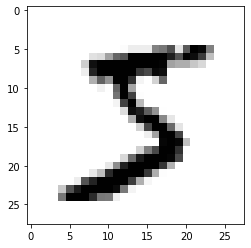

In [69]:
# Visualizando os dados
# criada a variável N para substituir por pontos especificos da tabela que desejam ser vistos
# 

n = 0

plt.imshow(x[n].reshape(28, 28), cmap = 'binary')
print(y[n])
plt.show

### Classificador Binário

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

In [72]:
y_train_5 = (y_train == 5)

In [73]:
y_train_5

array([False, False, False, ..., False, False, False])

In [74]:
pd.Series(y_train_5).value_counts()

False    44645
True      4355
dtype: int64

In [65]:
from sklearn.linear_model import SGDClassifier

In [76]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  True
Classe predita pelo modelo:  [ True]


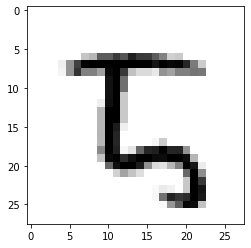

In [106]:
n = 48505

plt.imshow(x_train[n].reshape(28, 28), cmap = 'binary')
print('Classe real: ', y_train_5[n])
print('Classe predita pelo modelo: ', sgd_clf.predict([x_train[n]]))

In [ ]:
## Validando a qualidade da previsão de dados

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train, cv = 3, scoring = 'accuracy')